**<h1>Q2: Lane Marking Extraction and Segmentation</h1>**

**Processed Image: The original highway image with extracted white and yellow
lane markings highlighted.**

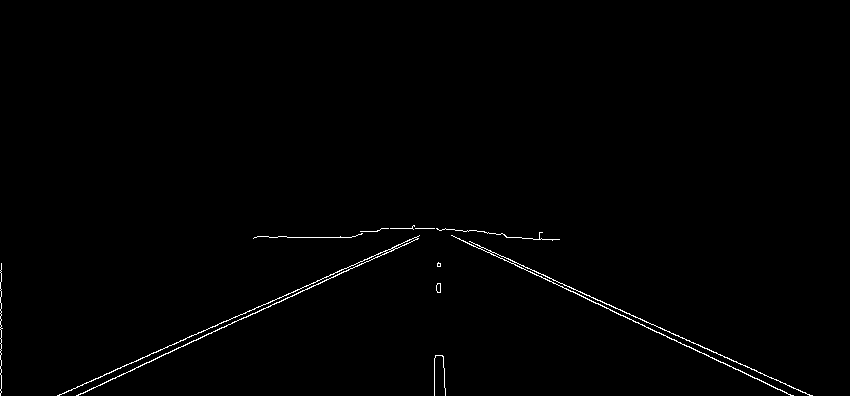

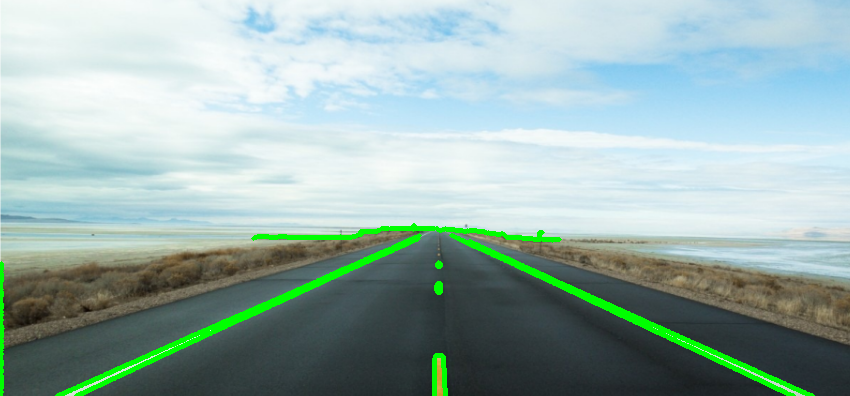

In [7]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
image = cv2.imread("road.png")
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(image, 200, 450)
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2_imshow(edges)
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
cv2_imshow(image)

**White Lane Mask: A black-and-white image where white lanes
are isolated.**

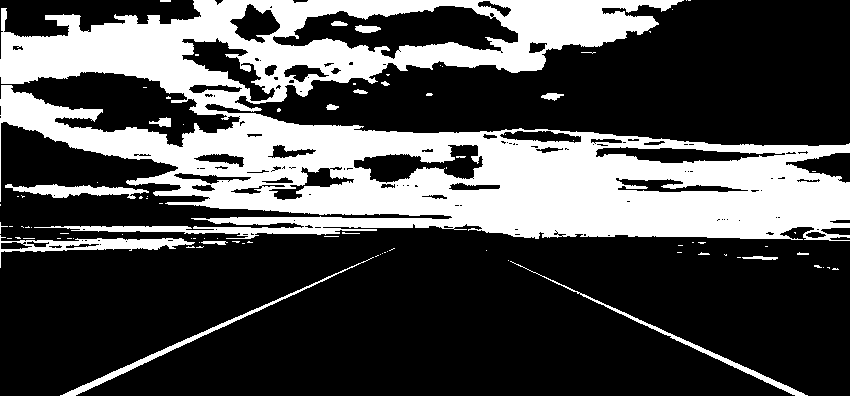

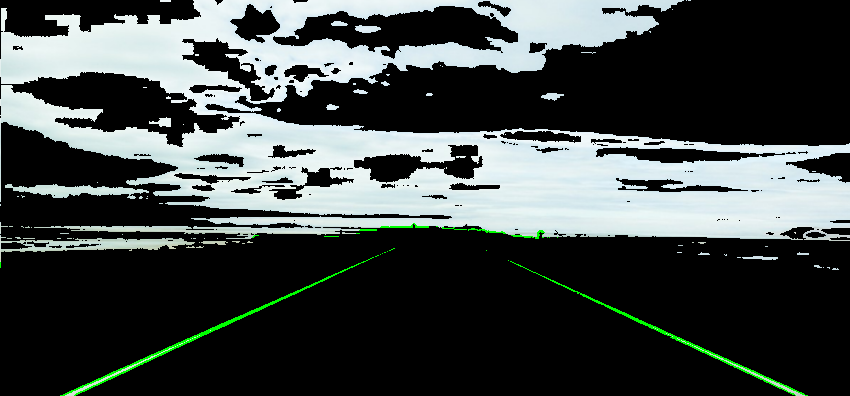

In [8]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
img = cv2.imread("road.png")


kernel = np.ones((5, 5), np.uint8)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

Lower_hsv = np.array([0, 10, 200])
Upper_hsv = np.array([135, 30, 255])

Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)


cv2_imshow( Mask)
masked_image = cv2.bitwise_and(image, image, mask=Mask)
cv2_imshow(masked_image)


**To further enhance the mask, we can use the horizontal contour found during edge detection, we can create two different masks for the part above the horizon and the part below so that only the White lines on the road are visible**

**Yellow Lane Mask: A black-and-yellow image where yellow lanes
are isolated.**

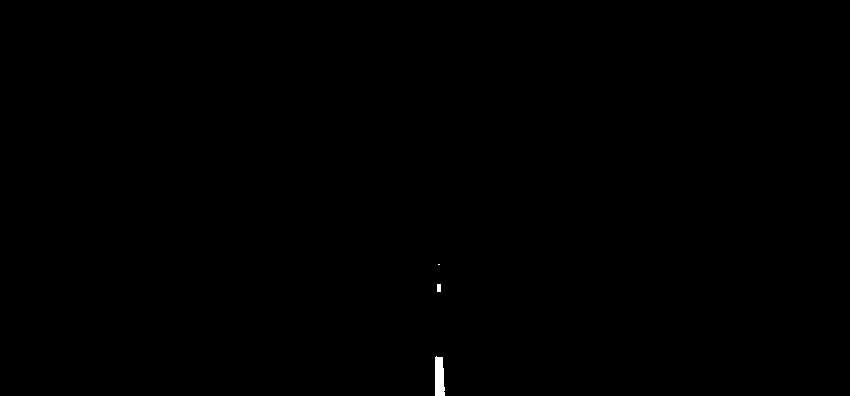

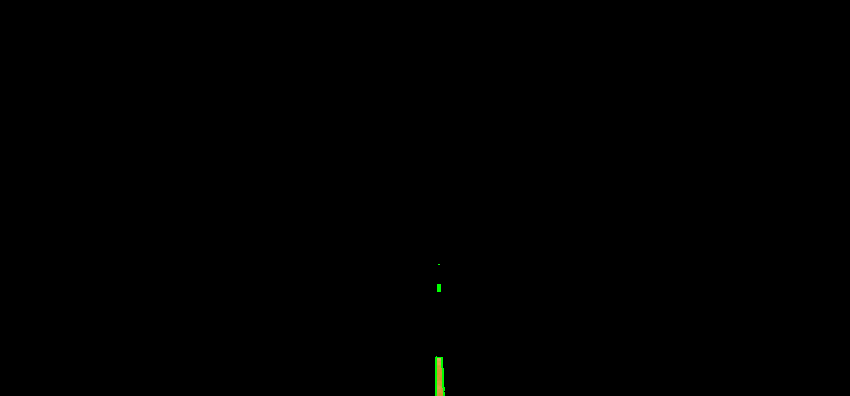

In [9]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
img = cv2.imread("road.png")


kernel = np.ones((5, 5), np.uint8)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

Lower_hsv = np.array([17, 110, 150])
Upper_hsv = np.array([40, 255, 255])


Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)

cv2_imshow( Mask)
masked_image = cv2.bitwise_and(image, image, mask=Mask)
cv2_imshow(masked_image)



Also, if we apply gaussian blur before canny edge detection, the small yellow lines get blurred and are not detected in canny edge detection.
This is useful for detecting only the major white lines.

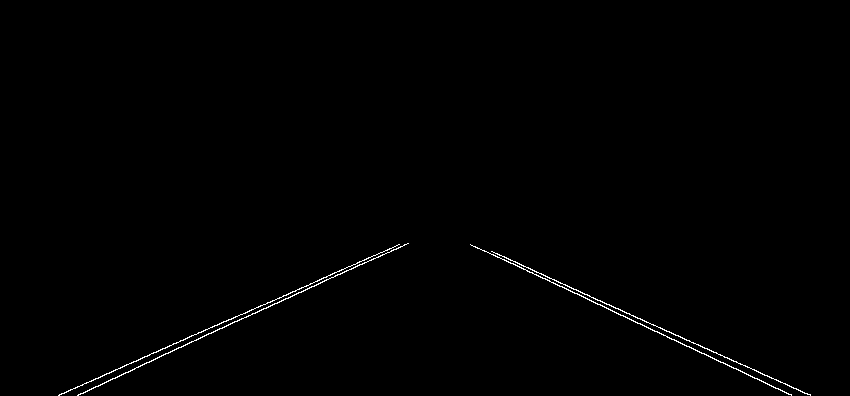

Number of Contours found = 4


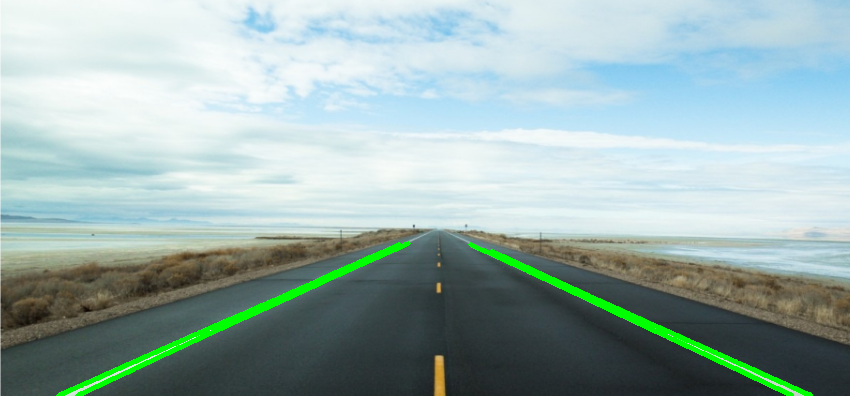

In [11]:
# ## Detects white lines

# import cv2
# import numpy as np
# image = cv2.imread("road.png")
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray  = cv2.GaussianBlur(gray, (3, 3), 0)  # Apply Gaussian blur
# edged = cv2.Canny(gray, 450, 200)
# contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cv2_imshow(edged)
# print("Number of Contours found = " + str(len(contours)))
# cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
# cv2_imshow(image)